# Bank Customer Retirement Predictions Using Support Vector Machines

## Step #1: Problem Statement

You work as a data scientist at a major bank in NYC and you have been tasked to develop a model that can predict whether a customer is able to retire or not based on their features. Features are age and net 401L savings. You think that a Support Vector Machine will be a great candidate to solve the problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Step #2: Importing Data

In [4]:
df = pd.read_csv('Data\Bank_Customer_retirement.csv')
df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [5]:
df.shape

(500, 4)

In [8]:
df.Retire.value_counts()

1    250
0    250
Name: Retire, dtype: int64

In [10]:
df.drop('Customer ID', axis=1, inplace=True)
df.head()

,Age,401K Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1


## Step #3: Visualizing the Data

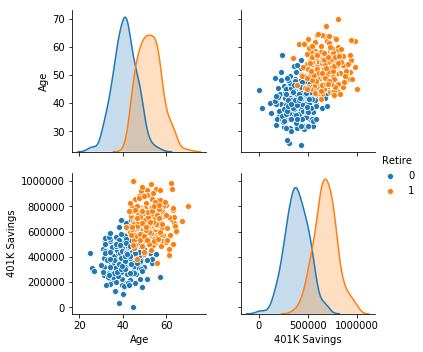

In [13]:
sns.pairplot(df, hue='Retire', vars=['Age', '401K Savings']);

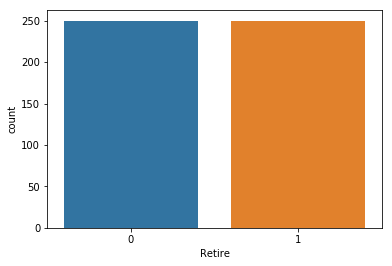

In [18]:
sns.countplot(df.Retire);

In [19]:
df.corr()

,Age,401K Savings,Retire
Age,1.000000,0.584608,0.729934
401K Savings,0.584608,1.000000,0.777673
Retire,0.729934,0.777673,1.000000


Age and 401K savings are somewhat correlated. I am going to try to make a separate variable that is a combination of the age and savings. The average lifespan of a person in the Unites States is ~80 years old. Let's combine the variables in this fashion:
$$\text{mpy}=\frac{\text{401K Savings}}{80-\text{Age}}$$
mpy is the amount of money they will have per year fromt their savings until they are 80.

In [39]:
mpy = pd.DataFrame(df['401K Savings'] / (80 - df.Age), columns=['mpy'])
print(mpy.shape), print(mpy.head());

(500, 1)
            mpy
0   7896.941925
1  32164.259564
2  35753.448988
3  13618.241387
4  27360.647973


In [45]:
df['mpy'] = mpy
df.head()

,Age,401K Savings,Retire,mpy
0,39.180417,322349.8740,0,7896.941925
1,56.101686,768671.5740,1,32164.259564
2,57.023043,821505.4718,1,35753.448988
3,43.711358,494187.4850,0,13618.241387
4,54.728823,691435.7723,1,27360.647973


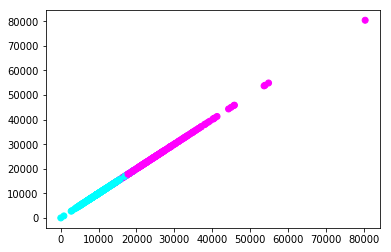

In [127]:

plt.scatter(df.mpy.values.ravel(), df.mpy.values.ravel(), c=df.Retire.values.ravel(), cmap='cool')

## Step #4: Model Training

In [53]:
X1 = df[['Age', '401K Savings']].values
X2 = df['mpy'].values
y = df['Retire']

In [128]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X1, y,
                                                      test_size=.20,
                                                      random_state=5)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y,
                                                      test_size=.20,
                                                      random_state=5)

In [129]:
X1_train.shape, X1_test.shape, X2_train.shape, X2_test.shape

((400, 2), (100, 2), (400,), (100,))

In [130]:
y_train.shape, y_test.shape

((400,), (100,))

**First run on unscaled model**

One for X1 and one for X2

In [142]:
from sklearn.svm import SVC
clf1 = SVC(gamma='auto')
clf2 = SVC(gamma='auto')

In [143]:
clf1.fit(X1_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [149]:
clf2.fit(X2_train.reshape(-1, 1), y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Step #5: Evaluate the Model

In [151]:
y1_pred = clf1.predict(X1_test)
y2_pred = clf2.predict(X2_test.reshape(-1,1))

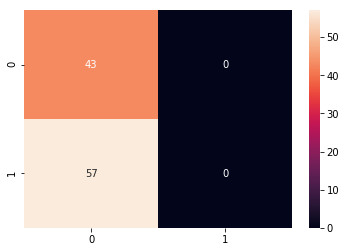

In [152]:
from sklearn.metrics import classification_report, confusion_matrix
cm1 = confusion_matrix(y_test, y1_pred)

sns.heatmap(cm1, annot=True);

In [153]:
print(classification_report(y_test, y1_pred));

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        43
           1       0.00      0.00      0.00        57

   micro avg       0.43      0.43      0.43       100
   macro avg       0.21      0.50      0.30       100
weighted avg       0.18      0.43      0.26       100



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


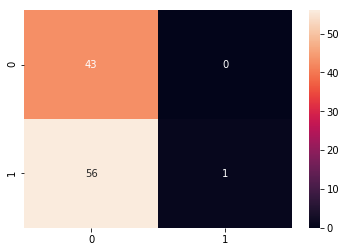

In [154]:
cm2 = confusion_matrix(y_test, y2_pred)

sns.heatmap(cm2, annot=True);

In [155]:
print(classification_report(y_test, y2_pred));

              precision    recall  f1-score   support

           0       0.43      1.00      0.61        43
           1       1.00      0.02      0.03        57

   micro avg       0.44      0.44      0.44       100
   macro avg       0.72      0.51      0.32       100
weighted avg       0.76      0.44      0.28       100



As expected... terrible with unscaled data. The mpy model actually got one of the positive class right.

## Step #6a: Improving the Model - Scaling

Going to use StandardScaler instead of my own sigmoid function. StandardScaler lets the test data be scaled based from the training data fit.

In [170]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
X1_train_sc = sc1.fit_transform(X1_train)
X2_train_sc = sc2.fit_transform(X2_train.reshape(-1, 1)).ravel()
X1_test_sc = sc1.transform(X1_test)
X2_test_sc = sc2.transform(X2_test.reshape(-1,1)).ravel()

In [172]:
clf1 = SVC(gamma='auto')
clf2 = SVC(gamma='auto')

In [173]:
clf1.fit(X1_train_sc, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [175]:
clf2.fit(X2_train_sc.reshape(-1,1), y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [177]:
y1_pred_sc = clf1.predict(X1_test_sc)
y2_pred_sc = clf2.predict(X2_test_sc.reshape(-1,1))

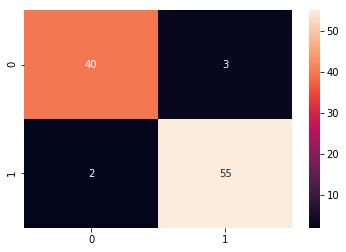

In [178]:
cm1 = confusion_matrix(y_test, y1_pred_sc)
sns.heatmap(cm1, annot=True);

In [179]:
print(classification_report(y_test, y1_pred_sc))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.95      0.96      0.96        57

   micro avg       0.95      0.95      0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



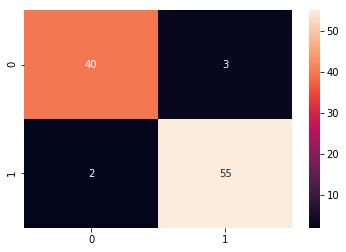

In [180]:
cm2 = confusion_matrix(y_test, y2_pred_sc)
sns.heatmap(cm1, annot=True);

In [181]:
print(classification_report(y_test, y2_pred_sc))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.95      0.96      0.96        57

   micro avg       0.95      0.95      0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



A ton better!

**Note:** Seems like my mpy variable is not making a difference

## Step #6b: Improving the Model - GridSearchCV

In [182]:
from sklearn.model_selection import GridSearchCV

In [183]:
params = [{'kernel': ['rbf', 'poly'], 'gamma': [.00001, .0001, .001, .01, .1, 0 ],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [184]:
grid1 = GridSearchCV(SVC(gamma='auto'), params, refit=True, verbose=1, cv=5, n_jobs=-1)
grid2 = GridSearchCV(SVC(gamma='auto'), params, refit=True, verbose=1, cv=5, n_jobs=-1)

In [185]:
grid1.fit(X1_train_sc, y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:   13.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['rbf', 'poly'], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [187]:
grid2.fit(X2_train_sc.reshape(-1, 1), y_train)

Fitting 5 folds for each of 52 candidates, totalling 260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 260 out of 260 | elapsed:   13.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'kernel': ['rbf', 'poly'], 'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 0], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [188]:
print("Best grid1:", grid1.best_params_)
print("Best grid2:", grid2.best_params_)

Best grid1: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best grid2: {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}


In [190]:
grid1_pred = grid1.predict(X1_test_sc)
grid2_pred = grid2.predict(X2_test_sc.reshape(-1, 1))

In [191]:
cm1 = confusion_matrix(y_test, grid1_pred)
cm1 = confusion_matrix(y_test, grid2_pred)

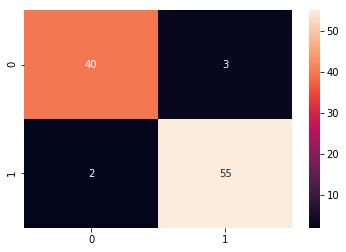

In [195]:
sns.heatmap(cm1, annot=True);

In [196]:
print(classification_report(y_test, grid1_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.95      0.96      0.96        57

   micro avg       0.95      0.95      0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



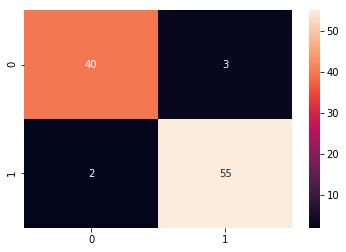

In [197]:
sns.heatmap(cm2, annot=True);

In [198]:
print(classification_report(y_test, grid2_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.95      0.96      0.96        57

   micro avg       0.95      0.95      0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



Our GridSearch did not help with our data. With more datapoints, it might show more of a difference.